# ACSE-7 (Inversion and Optimisation)  <a class="tocSkip"></a>

# Homework Lecture 3: Gradient Based Methods <a class="tocSkip"></a>

<font size="1pt">Some $\LaTeX$ definitions hidden in this cell (double-click to reveal)</font>
$
\renewcommand\vec[1]{\mathbf{#1}}
\newcommand\mat[1]{\underline{\mathbf{#1}}}
\newcommand\R{\mathbb{R}}
\newcommand\todo[1]{\textcolor{red}#1}
$

In [1]:
import numpy as np
import scipy.linalg as sl
import matplotlib.pyplot as plt
# font sizes for plots
plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']

In [2]:
%matplotlib inline

# Newton's method

## Root Finding

Solve the following non-linear equations using Newton's method. Write your own Newton solver or copy some code of the lecture notes.

* $e^x = -x$

* $F(x)=0$ with $F(x) = x^4 + 2 x^3 - 72 x^2 - 18 x + 567$. How many roots does this nonlinear equation potentially have? Try to find them all by trying different initial guesses in the range $-10 \leq x_0 \leq 10$.

* $tanh(x)=\frac{1}{2}$. Try a few different values for the initial guess, what do you observe?

* find a solution $x,y$ for the system of equations:

$$
  (x+1)^3 + (y+1)^3 + x + y = 10 \\
  (y+1)^3 = e^x
$$

Note that you need a version of Newton's method that (unlike `newton_method` in the lectures notes), works in multiple dimensions. This means that to find the search direction $\vec p$ you need to solve $\vec F'(\vec x^{(i)}) \vec p = -\vec F(\vec x^{(i)})$. For this you may use scipy's [solve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve.html):
```python
Fx = F(x)  # function F should return a vector
dFdx = jac(x)  # function jac should return the Jacobian matrix
p = sl.solve(dFdx, -Fx)
```

## Optimisation
Now use Newton's method to find the minimum of:

* $ f(x,y) = (x+3)^4 + (y-1)^4 $

* $f(x,y) = \tanh(\tfrac{1}{10}(x^2+y^2-4x-2y+5))$. To save you some time, we give you the code for the function, and its first and second derivative:

In [15]:
def f(X):
    x,y = X
    return np.tanh(0.1*(x**2+y**2-4*x-2*y+5))

def F(X):
    x,y = X
    return 0.1*(1-f(X)**2)*np.array([2*x-4, 2*y-2])

def dFdx(X):
    x,y = X
    return 0.1*np.outer(-2*f(X)*F(X), [2*x-4, 2*y-2]) + 2*(1-f(X)**2)*np.identity(2)

Try some different initial conditions, e.g $(x,y)=(0,0)$ and $(x,y)=(5,5)$. What do you notice? Try to figure out what happens when things go wrong: plot the function $f$ using the code below and add some print statements to see what the method is doing. Try to use the Newton method with line search `newton_method_ls` from the lecture notes instead.

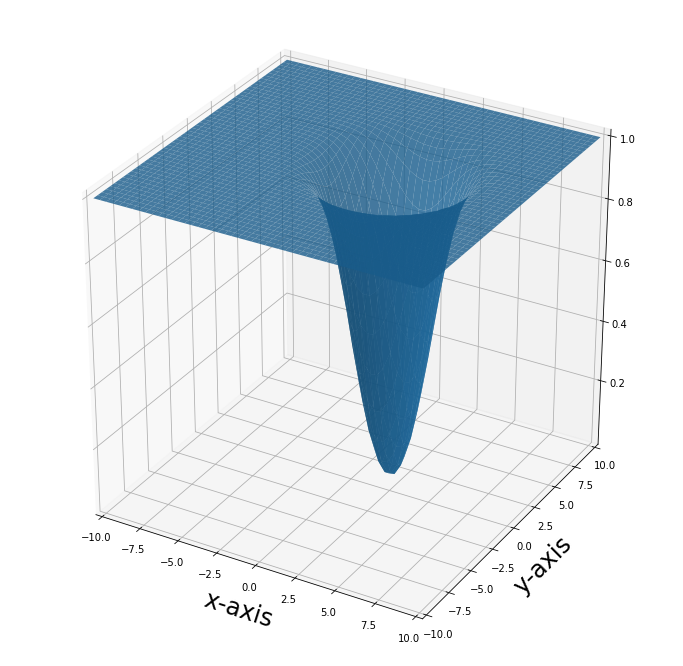

In [16]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.axis([-10,10,-10,10])
xr = np.linspace(-10, 10, 50)
yr = np.linspace(-10, 10, 50)
# create a 2 x Nx x Ny (Nx=Ny=50) array of grid points
xy = np.array(np.meshgrid(xr, yr))
ax.plot_surface(xy[0,:,:], xy[1,:,:], f(xy), alpha=0.8)
ax.set_xlabel('x-axis', size=24, labelpad=10)
ax.set_ylabel('y-axis', size=24, labelpad=10);

* $f(x,y) = (1.5-x + xy)^2 + (2.25 - x + xy^2)^2 + (2.625 -x + xy^3)^2$
Again, we give you the code for the function itself, and its first and second derivative: $f'(x,y)=F(x,y)$ and $f''(x,y)=F'(x,y)$:

In [24]:
def f(X):
    x,y = X
    return (1.5-x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 -x + x*y**3)**2
    
def F(X):
    x, y = X
    dfdx = 2*(1.5-x+x*y)*(-1+y) + 2*(2.25-x+x*y**2)*(-1+y**2) + 2*(2.625 -x + x*y**3)*(-1+y**3)
    dfdy = 2*(1.5-x+x*y)*x + 4*(2.25-x+x*y**2)*x*y + 6*(2.625 - x + x*y**3)*x*y**2
    return np.array([dfdx, dfdy])

def dFdx(X):
    x, y = X
    dfdx2 = -2*(-1+y) + 2*(-1+y**2)**2 + 2*(-1+y**3)**2
    dfdxy = 2*x*(-1+y) + 2*(1.5-x+x*y) + 4*x*y*(-1+y**2) + 4*(2.25-x+x*y**2)*y + 6*x*y**2*(-1+y**3) + 6*(2.625-x+x*y**3)*y**2
    dfdy2 = 2*x**2 + 8*x**2*y**2 + 4*(2.25-x+x*y**2) + 18*x**2*y**4 + 12*(2.625 - x + x*y**3)*x*y
    return np.array([[dfdx2, dfdxy],[dfdxy, dfdy2]])

Try to use both the `newton_method` and `newton_method_ls` codes. Check whether the $(x,y)$ of the last iteration that these methods returns is indeed a local minimum by checking the values of the first derivative $f'(x, y)=F(x, y)$ and second derivative $f''(x,y) = F(x,y)$. What conditions on these should be true for $(x,y)$ to be a local minimum?

You will find that neither method work very well (or at all) for this problem. Can you figure out what is going wrong in the different cases you get using both methods and different initial guesses? **Hint:** look at the eigenvalues of the Hessian and check whether the Newton step direction $\vec p$ is actually a descent direction.

* Instead try to find the minimum of the last question using `minimize` from `scipy.optimize`:

```python
    import scipy.optimize as sop
    x0 = [0., 0.]
    result = sop.minimize(f, x0, jac=F, hess=dFdx, method='trust-ncg')
    print('Succesful: ', result['success'])
    print('N/o iterations: ', result['nit'])
    print('Minimum at: ', result['x'])
```

The `trust-ncg` method combines Newton-CG - Newton's method where the linear solve in the Newton update is solved using the Conjugate Gradient method - with a trust region method. How does this method overcome the problem encountered in the last question?

Instead of `trust-ncg` try the `newton-cg` method - this is Newton-CG with a simple line search. You may find that this version of Newton+line search is also succesful; The reason for that will be explained in lecture 4 in the section "Truncated Newton Method".

You can also try the `cg` method which is the nonlinear version of CG discussed at the end of lecture 2.

See [scipy's documentation of minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html), in particular also the notes at the bottom of that page, for more details on the various methods available.

* $$
  f(x, y) = \frac{\left(x^2 + (\gamma y)^2 -1\right)^2}{x^2 + (\gamma y)^2 - 1/h} - y,
$$

This is the example from today's lecture. The code for the function, and its first and second derivative can be found in the lecture notes. Like in the lecture notes, use $\gamma=0.5, h=10$ and an initial guess of $\vec x_0=(-0.5, -0.5)$.

# Solving over determined systems

## Population growth
Try to fit the exponential growth model
$$
  G(X) = C_1 \exp(C_2 X)
$$
for a number of different countries following the steps in the lecture notes. You can obtain 
the data for the years 1950-2020 from [this spreadsheet](https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/EXCEL_FILES/1_Population/WPP2019_POP_F01_1_TOTAL_POPULATION_BOTH_SEXES.xlsx). Compute a measure for the quality of the exponential fit for these cases

## Tidal Analysis
The tides around the world are ultimately caused by the periodic gravitational forcing of the Sun and the Moon. The two main frequencies (in radians/hour) are given by:

$$
  \omega_1 = 2\pi / 12.4206, \quad
  \omega_2 = 2\pi / 12.0
$$

which are derived from the time difference between the highest daily point of the Moon, and the point at which it is exactly at the opposite side of the Earth, and similarly the time difference between midday and midnight for the Sun.

A good approximation for the tide at a given location is then of the form:

$$
  h(t) = A_1 \cos(\omega_1 t + \alpha_1) + A_2 \cos(\omega_2 t + \alpha_2) + h_0
$$

where $A_1$ and $A_2$ are the amplitudes, and $\alpha_1$ and $\alpha_2$ are the phases of the two tidal constituents. $h_0$ is the mean water level.

1. Using $A_1=1.0, A_2=0.2, \alpha_1=0., \alpha_2=0.5, h_0=0$ plot the tide for two days, and for a month (31\*24 hours) Next to the twice-daily tide, what do you observe? Try to relate this phenomenom with the difference in frequencies, and its associated time scale $2\pi/(\omega_1 - \omega_2)$

2. You are given the water elevations of a tidal gauge located in the harbour of New York ([Willets Point](https://en.wikipedia.org/wiki/Willets_Point,_Queens)). We try to match these measurements with the two-component tide formula given above, where we need to invert for the amplitudes and the phases and the mean water level. After the optimisation compute the l2-norm error between the nonlinear regression and the measurements. Also compute a percentage absolute error:

$$
  \frac{\sum_{i=1}^n |h(X_i) - Y_i|}n \times 100\%
$$

**Hint:** The vector $\vec x$ we optimize for should be a 5-vector containing the 5 parameters:

$$
  \vec x = (A_1, A_2, \alpha_1, \alpha_2, h_0)
$$

The vector $\vec X$ is the vector of measurement times, and the vector $Y$ the measured water levels. We therefore need a residual function:

$$
  R(\vec x) = \text{tide}(\vec x, X) - \vec Y,
$$

where $\text{tide}(\vec x, X)$ is a function that for the given parameter $\vec x$ returns the tidal levels at times $\vec X$.

We use the `least_squares` routine from `scipy.optimize`. You can use the below layout for your code:

In [48]:
Y = np.loadtxt('willet1932.dat')  # observations from 'willet1932.dat' file
# The measurement times. The observations are hourly
# starting from 1932-1-1 0:0:0 GMT which we choose as t=0
# The vector of times X (in hours) is then simply 0, 1, 2, ...
X = np.arange(len(Y))

# tidal frequencies
omega1 = 2*np.pi/12.4206
omega2 = 2*np.pi/12.

def tide(x, X):
    A1, A2 = x[0:2]
    alpha1, alpha2 = x[2:-1]
    h0 = x[-1]
    return ...

def R(x):
    return tide(x, X) - Y

def dRdx(x):
    A1, A2 = x[0:2]
    alpha1, alpha2 = x[2:-1]
    h0 = x[-1]
    derivatives = []
    
    derivatives.append(...)  # derivative wrt A1
    derivatives.append(...)  # derivative wrt A2
    derivatives.append(...)  # derivative wrt alpha1
    derivatives.append(...)  # derivative wrt alpha2
    derivatives.append(...)  # derivative wrt h0
    
    # NOTE: least_squares expects dRdx to return a n x m array
    # where n is the length of X
    # and m is the lenght of x (the number of derivatives)
    # therefore we need a transpose:
    return np.array(derivatives).T

In [ ]:
x0 = [0,0,0,0,0]
result = sop.least_squares(R, x0, jac=dRdx, method='lm')
print('Succesful:', result['success'])
x = result['x']
A1, A2, alpha1, alpha2, h0 = x
print("amplitudes A1, A2 =", A1, A2)
print("phases alpha1, alpha2 =", alpha1, alpha2)
print("mean water level h0 = ", h0)

In [ ]:
plt.figure(figsize=(12,4))
# plotting first 20 days=480 hours:
plt.plot(tide(x, X[:480]), label='reconstruction')
plt.plot(Y[:480], label='measurements')
plt.legend()

3. You are also given the predictions by [NOAA](https://tidesandcurrents.noaa.gov/) of the tide at Willets Point for the month March 2020. Use the parameters from question 2. to make your own prediction of the tide for this month and compare with that of NOAA. You can read the prediction by NOAA using:
```python
Y_mar2020 = np.loadtxt('willet-mar2020.dat')
```
Again these predictions are hourly but now starting at 1 March 2020 0:0:0 GMT. Since in our nonlinear regression in the previous question we used 1 Jan 1932 0:0:0 as our t=0 point, we need to add the number of hours between these two dates as our starting point. Again compute an l2-norm error and a percentage absolute error. You can use the following code:

In [ ]:
import datetime
td = datetime.datetime(2020,3,1)-datetime.datetime(1932,1,1)
X_mar2020 = np.arange(len(Y_mar2020)) + td.total_seconds()/3600.
plt.figure(figsize=(12,4))
plt.plot(X_mar2020, Y_mar2020, label='NOAA')
plt.plot(X_mar2020, tide(x, X_mar2020), label='my prediction')
